# **Data Analyst Part** 📊​

## **Initialisation**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading

In [46]:
data_path = '../Data Engineer/clean_flights.csv'
df = pd.read_csv(data_path)
df.head(5)

C:\Users\natha\AppData\Local\Temp\ipykernel_19036\2572680934.py:2: DtypeWarning: Columns (0: ORIGIN_AIRPORT, 1: DESTINATION_AIRPORT) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,YEAR,MONTH,DAY,DAY_OF_WEEK,TIMESTAMP,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
0,2015,1,1,4,2015-01-01 00:05:00,Alaska Airlines Inc.,98,N407AS,ANC,SEA,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS
1,2015,1,1,4,2015-01-01 00:10:00,American Airlines Inc.,2336,N3KUAA,LAX,PBI,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA
2,2015,1,1,4,2015-01-01 00:20:00,US Airways Inc.,840,N171US,SFO,CLT,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US
3,2015,1,1,4,2015-01-01 00:20:00,American Airlines Inc.,258,N3HYAA,LAX,MIA,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA
4,2015,1,1,4,2015-01-01 00:25:00,Alaska Airlines Inc.,135,N527AS,SEA,ANC,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS


In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   TIMESTAMP            str    
 5   AIRLINE              str    
 6   FLIGHT_NUMBER        int64  
 7   TAIL_NUMBER          str    
 8   ORIGIN_AIRPORT       object 
 9   DESTINATION_AIRPORT  object 
 10  SCHEDULED_DEPARTURE  int64  
 11  DEPARTURE_TIME       float64
 12  DEPARTURE_DELAY      float64
 13  TAXI_OUT             float64
 14  WHEELS_OFF           float64
 15  SCHEDULED_TIME       float64
 16  ELAPSED_TIME         float64
 17  AIR_TIME             float64
 18  DISTANCE             int64  
 19  WHEELS_ON            float64
 20  TAXI_IN              float64
 21  SCHEDULED_ARRIVAL    int64  
 22  ARRIVAL_TIME         float64
 23  ARRIVAL_DELAY        float64
 24  DIVERTED 

=> `TIMESTAMP` is in *string* format !

### Converting `TIMESTAMP` to *datatime64*

In [48]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   TIMESTAMP            datetime64[us]
 5   AIRLINE              str           
 6   FLIGHT_NUMBER        int64         
 7   TAIL_NUMBER          str           
 8   ORIGIN_AIRPORT       object        
 9   DESTINATION_AIRPORT  object        
 10  SCHEDULED_DEPARTURE  int64         
 11  DEPARTURE_TIME       float64       
 12  DEPARTURE_DELAY      float64       
 13  TAXI_OUT             float64       
 14  WHEELS_OFF           float64       
 15  SCHEDULED_TIME       float64       
 16  ELAPSED_TIME         float64       
 17  AIR_TIME             float64       
 18  DISTANCE             int64         
 19  WHEELS_ON            float64    

---
## **Transition to art** 🎨

### **First question** : Which airline operated the most flights in this sample ?

C:\Users\natha\AppData\Local\Temp\ipykernel_19036\1767102369.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AIRLINE', palette='deep')


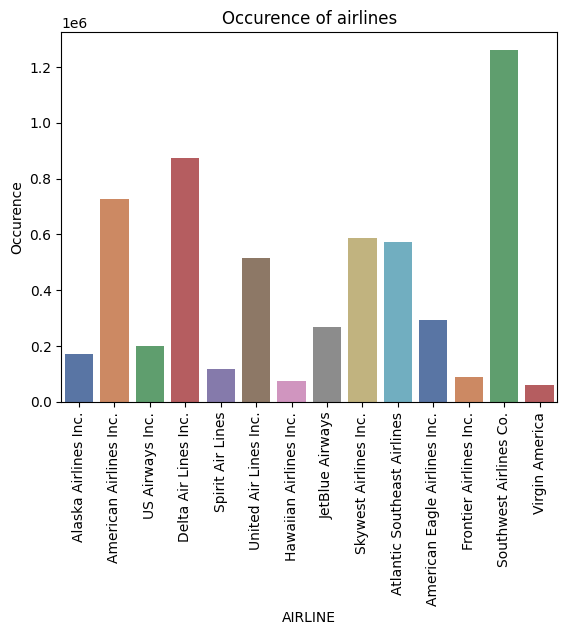

In [49]:
sns.countplot(data=df, x='AIRLINE', palette='deep')
plt.xticks(rotation=90)
plt.ylabel('Occurence')
title = 'Occurence of airlines'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

=> The airline **Southwest Airlines Co.** operated the most flights here.

### Let see the delay distribution :

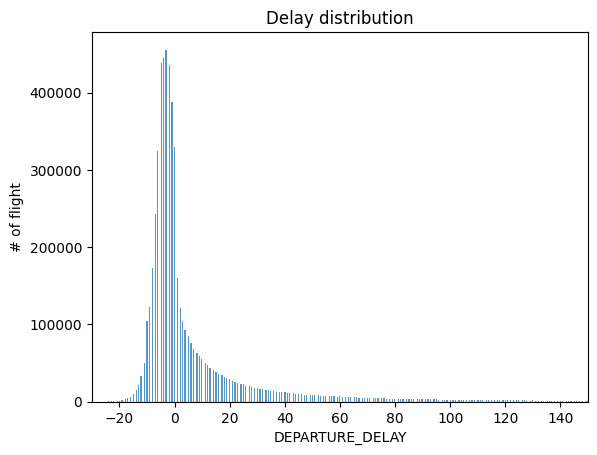

In [50]:
sns.histplot(data=df, x='DEPARTURE_DELAY')
plt.ylabel("# of flight")
plt.xlim(-30,150)
title = 'Delay distribution'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

As we can see, we have a lot of delay between 1' to 60'. We also can see that some flights are ahead of 20'.

### Now, what about the mean delay of each airline ?

C:\Users\natha\AppData\Local\Temp\ipykernel_19036\3478192658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AIRLINE', y='DEPARTURE_DELAY', palette='Paired', order=sort_order, errorbar=None)


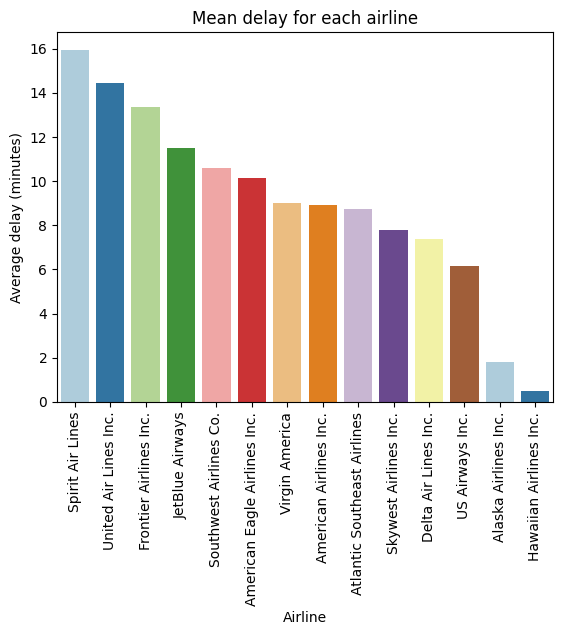

In [51]:
sort_order = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).mean().sort_values(ascending=False).index

sns.barplot(data=df, x='AIRLINE', y='DEPARTURE_DELAY', palette='Paired', order=sort_order, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel('Average delay (minutes)')
plt.xlabel('Airline')
title = 'Mean delay for each airline'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

We can see that the airline with the worst average delay is **Spirit Air Lines** and the one with the best is **Hawaiian Airlines**.

### What about the weather ? Let see the delay evolution during the year and maybe catching something.

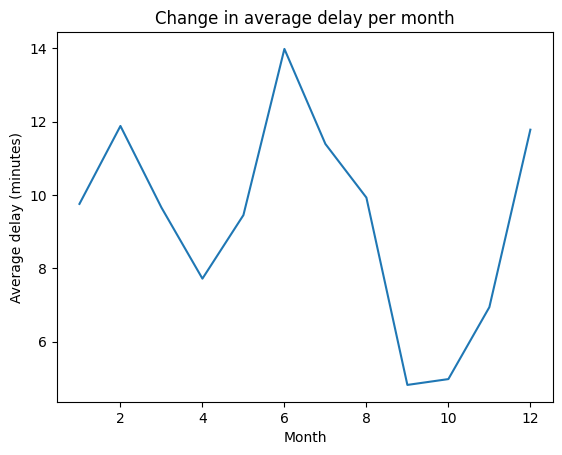

In [52]:
data_by_month = df['DEPARTURE_DELAY'].groupby(df['MONTH']).mean()

sns.lineplot(data=data_by_month)
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Average delay (minutes)')
title = 'Change in average delay per month'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

As we can see, we have **three pics**, the first one is certainly due to the weather.  
For the second and the third, it seems consistent because it's in *June-July* and *December*, so during the holidays.

### Let us see which day is most suitable to avoid any delays.

C:\Users\natha\AppData\Local\Temp\ipykernel_19036\3727701188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_by_day.index, y=data_by_day.values, palette='hls', errorbar=None)


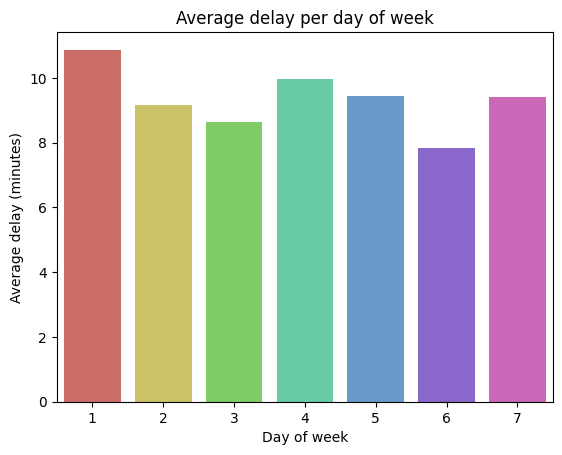

In [53]:
data_by_day = df['DEPARTURE_DELAY'].groupby(df['DAY_OF_WEEK']).mean()

sns.barplot(x=data_by_day.index, y=data_by_day.values, palette='hls', errorbar=None)
plt.xlabel('Day of week')
plt.ylabel('Average delay (minutes)')
title = 'Average delay per day of week'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

As can be seen, the best day to travel is the Saturday and the worst day is the Monday.  
**Why is that ?**  
In fact, the Monday it's the beginning of the working week so we have a lot of business travellers.  
In opposition the Saturday the working week is over so we have less business travellers.

### Now let's select only Saturday flights operated by Hawaiin Airlines.

In [54]:
df_HA_sat = df[(df['AIRLINE'] == 'Hawaiian Airlines Inc.') & (df['DAY_OF_WEEK'] == 6)]
df_HA_sat.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,TIMESTAMP,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
30755,2015,1,3,6,2015-01-03 01:45:00,Hawaiian Airlines Inc.,17,N395HA,LAS,HNL,...,45.0,0,0,NaN,0.0,0.0,36.0,9.0,0.0,HA
30787,2015,1,3,6,2015-01-03 05:00:00,Hawaiian Airlines Inc.,102,N491HA,HNL,ITO,...,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,HA
30789,2015,1,3,6,2015-01-03 05:02:00,Hawaiian Airlines Inc.,108,N486HA,HNL,KOA,...,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,HA


Let us examine the average delay of these flights:

In [55]:
delay_HA_on_sat = df_HA_sat['DEPARTURE_DELAY'].mean()

print(f"The average delay of the Hawaiian Airlines Inc. on Saturday is {delay_HA_on_sat:.2f} minutes.")

The average delay of the Hawaiian Airlines Inc. on Saturday is 0.25 minutes.


We can see that the average delay is 0.25 mins which is equal to **15 secondes**.  
So we can say that the **Hawaiian Airlines** Inc. is never late.

> To answer the question : *Which airline is best for avoiding delays?*  
> My answer is <span style="color: #c30606;"> **Hawaiian Airlines Inc.**</span> and if you want to avoid delays altogether, take a flight on **Saturday**.

----

### **Second question**: Does a delay in departure necessarily mean a delay in arrival?

Let us see the relation between `DEPARTURE_DELAY` and `ARRIVAL_DELAY` using a *scatterplot*.

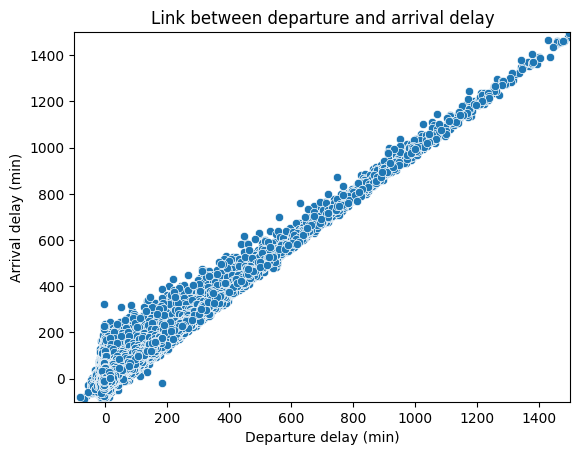

In [56]:
sns.scatterplot(data=df, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY")
plt.xlim(-100, 1500)
plt.ylim(-100, 1500)
plt.xlabel('Departure delay (min)')
plt.ylabel('Arrival delay (min)')
title = 'Link between departure and arrival delay'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

As we can see, we have a lot of arrival delay which are more important than the departure delay, certainly due to traffic jam, etc...

### Let's check our correlation matrix:

In [57]:
# Poor visualization
corr_mat = df[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]].corr()
print(corr_mat)

                 DEPARTURE_DELAY  ARRIVAL_DELAY
DEPARTURE_DELAY         1.000000       0.944672
ARRIVAL_DELAY           0.944672       1.000000


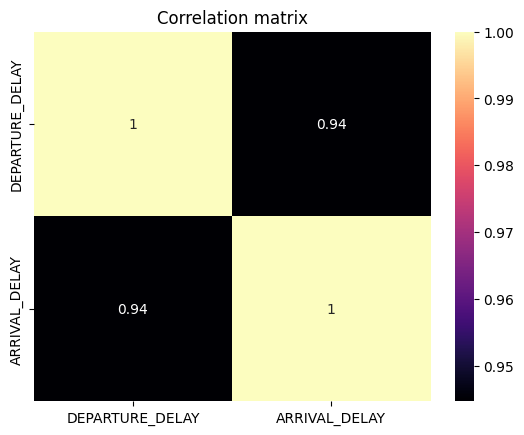

In [58]:
# Better visualization
sns.heatmap(corr_mat, annot=True, cmap='magma')
title = 'Correlation matrix'
plt.title(title)
plt.savefig(f"Exports/{title}.png", dpi=300, bbox_inches='tight')

> We have a correlation of **0.94** which is almost 1, meaning that no delay can be made up.